# Data Acquisition, Pre-processing and Exploratory Data Analysis.

###Data Acquisition section

Installation of Kaggle python package.

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mount google drive to access data on drive, in this case Kaggle API token.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Make a kaggle directory in Colab instance storage.

In [ ]:
# !rm -r ~/.kaggle
!mkdir ~/.kaggle

Copy Kaggle API token from drive to temporary directory created above.

In [ ]:
! cp /content/drive/MyDrive/Colab_Notebooks/Kaggle_API/kaggle.json ~/.kaggle/kaggle.json

Change the file permissions to read or write to the owner only.

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Download air pollution data from kaggle webpage to Colab instance storage using Kaggle API.

In [ ]:
! kaggle datasets download rohanrao/air-quality-data-in-india

 97% 71.0M/72.9M [00:00<00:00, 248MB/s]
100% 72.9M/72.9M [00:00<00:00, 230MB/s]


Unzip the air pollution data to extract individual CSV files on to Colab instance storage.

In [ ]:
! unzip air-quality-data-in-india.zip

Archive:  air-quality-data-in-india.zip
  inflating: city_day.csv            
  inflating: city_hour.csv           
  inflating: station_day.csv         
  inflating: station_hour.csv        
  inflating: stations.csv            


Download meteorological data from kaggle webpage to Colab instance storage using Kaggle API.

In [ ]:
! kaggle datasets download hiteshsoneji/historical-weather-data-for-indian-cities

 42% 5.00M/11.8M [00:00<00:00, 39.8MB/s]
100% 11.8M/11.8M [00:00<00:00, 54.4MB/s]


Unzip the meteorological data to extract individual CSV files on to Colab instance storage.

In [ ]:
! unzip historical-weather-data-for-indian-cities.zip

Archive:  historical-weather-data-for-indian-cities.zip
  inflating: bengaluru.csv           
  inflating: bombay.csv              
  inflating: delhi.csv               
  inflating: hyderabad.csv           
  inflating: jaipur.csv              
  inflating: kanpur.csv              
  inflating: nagpur.csv              
  inflating: pune.csv                


Remove or delete zip file of air pollution data.

In [ ]:
!rm air-quality-data-in-india.zip

Remove or delete zip file of meteoroological data.

In [ ]:
! rm historical-weather-data-for-indian-cities.zip

Delete csv file of data related to air pollution data that is not required for this study.

In [ ]:
! rm station_day.csv
! rm city_day.csv
! rm city_hour.csv

*Coding reference for above executions:*

https://www.youtube.com/watch?v=yEXkEUqK52Q

https://github.com/bnsreenu/python_for_microscopists/blob/master/Tips_tricks_35_loading_kaggle_data_to_colab.ipynb

###Data Pre-processing and Exploratory data analysis section.

Importing necessary python libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set visulizaion background type.

In [ ]:
sns.set_style("dark")

Load hourly air pollution concentraions data based on monitoring stations, into pandas data frame.

In [ ]:
station_hr_df = pd.read_csv('/content/station_hour.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Have a glance of the data frame.

In [ ]:
station_hr_df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


Check dimensions of the data frame i.e., (number of rows/observations, number of columns/features).

In [ ]:
station_hr_df.shape

(2589083, 16)

Check the fraction of null values in all columns of air pollution data frame.

In [ ]:
station_hr_df.isnull().sum()/ station_hr_df.shape[0]

StationId     0.000000
Datetime      0.000000
PM2.5         0.250162
PM10          0.432297
NO            0.213864
NO2           0.204309
NOx           0.189568
NH3           0.477628
CO            0.192849
SO2           0.286873
O3            0.280398
Benzene       0.332774
Toluene       0.402600
Xylene        0.801482
AQI           0.220229
AQI_Bucket    0.220229
dtype: float64

Delete unnecessary columns from air pollution concentraion data frame.

In [ ]:
station_hr_df.drop(columns=['Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'], inplace=True)

Load data containing air pollution monitoring stations and the cities they belong to.

In [ ]:
stations_df = pd.read_csv('/content/stations.csv')

Have a glance of data frame containing air pollution monitoring stations and corresponding cities.

In [ ]:
stations_df.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


Delete unnecessary columns from air pollution monitoring staions data.

In [ ]:
stations_df.drop(columns=['StationName', 'State', 'Status'], inplace=True)

Merge air pollution concentraion data frame and air pollution monitoring staions data frame with common column 'StaionId'.

In [ ]:
station_hr_df1 = station_hr_df.merge(stations_df, on='StationId')

Have a glance of meged data frame which will be called air pollution data frame here after.

In [ ]:
station_hr_df1.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,City
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,Amaravati
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,Amaravati
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,Amaravati
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,Amaravati
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,Amaravati


Check dimensions of air pollution data frame.

In [ ]:
station_hr_df1.shape

(2589083, 12)

Check all the columns of the air pollution data frame.

In [ ]:
station_hr_df1.columns

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'City'],
      dtype='object')

Check all the distinct cities in the air pollution data frame.

In [ ]:
station_hr_df1.City.unique()

array(['Amaravati', 'Visakhapatnam', 'Guwahati', 'Patna', 'Chandigarh',
       'Delhi', 'Ahmedabad', 'Gurugram', 'Jorapokhar', 'Bengaluru',
       'Ernakulam', 'Kochi', 'Thiruvananthapuram', 'Mumbai', 'Shillong',
       'Bhopal', 'Aizawl', 'Brajrajnagar', 'Talcher', 'Amritsar',
       'Jaipur', 'Hyderabad', 'Chennai', 'Coimbatore', 'Lucknow',
       'Kolkata'], dtype=object)

*Looking at the distinct cities in air pollution data frame from above and the cities for which the meteorological data is availabe from Colab instance storage, it can be observed that there only five cities for which both air pollution data and meteorological data are available.*

Create a list of the five cities which have both air pollution data and meteorological data.

In [ ]:
cities_required1 = ['Bengaluru', 'Mumbai', 'Delhi', 'Hyderabad', 'Jaipur']
cities_required1

['Bengaluru', 'Mumbai', 'Delhi', 'Hyderabad', 'Jaipur']

Delete csv files of meteorological data for cities which don't have air pollution data, from Colab instance storage.

In [ ]:
! rm kanpur.csv
! rm nagpur.csv
! rm pune.csv

Delete observations/rows from air pollution data frame, which contain data for cities other than the ones listed above.

In [ ]:
for i in station_hr_df1.City.unique():
  if i not in cities_required1:
    station_hr_df1.drop(index=station_hr_df1[station_hr_df1.City == i].index, inplace=True)

Check the new dimension of the air pollution data frame.

In [ ]:
station_hr_df1.shape

(1790565, 12)

Check the distinct cities of the air pollution data frame and verifies that data is available for only those cities which have air pollution data as well as meteorological data.

In [ ]:
station_hr_df1.City.unique()

array(['Delhi', 'Bengaluru', 'Mumbai', 'Jaipur', 'Hyderabad'],
      dtype=object)

Check the fraction of null values in all columns for the updated data frame.

In [ ]:
station_hr_df1.isnull().sum() / station_hr_df1.shape[0]

StationId    0.000000
Datetime     0.000000
PM2.5        0.257932
PM10         0.356585
NO           0.220836
NO2          0.208042
NOx          0.177738
NH3          0.434734
CO           0.192411
SO2          0.310226
O3           0.283915
City         0.000000
dtype: float64

Check the data types of all the columns of air pollution data frame.

In [ ]:
station_hr_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790565 entries, 141133 to 2204278
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   StationId  object 
 1   Datetime   object 
 2   PM2.5      float64
 3   PM10       float64
 4   NO         float64
 5   NO2        float64
 6   NOx        float64
 7   NH3        float64
 8   CO         float64
 9   SO2        float64
 10  O3         float64
 11  City       object 
dtypes: float64(9), object(3)
memory usage: 177.6+ MB


Convert 'Datetime' column data type to appropriate form that would contain time stamps in proper format.

In [ ]:
station_hr_df1.Datetime = pd.to_datetime(station_hr_df1.Datetime)

Verifying that the above done change has been implemented.

In [ ]:
station_hr_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790565 entries, 141133 to 2204278
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   StationId  object        
 1   Datetime   datetime64[ns]
 2   PM2.5      float64       
 3   PM10       float64       
 4   NO         float64       
 5   NO2        float64       
 6   NOx        float64       
 7   NH3        float64       
 8   CO         float64       
 9   SO2        float64       
 10  O3         float64       
 11  City       object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 177.6+ MB


Generate a new column of year 'Datetime' in air pollution data frame.

In [ ]:
station_hr_df1['Year'] = station_hr_df1.Datetime.dt.year

Check the distinct year values in air pollution data frame.

In [ ]:
station_hr_df1.Year.unique()

array([2018, 2019, 2020, 2015, 2016, 2017])

Check the oldest timestamp available in air pollution data frame.

In [ ]:
station_hr_df1.Datetime.min()

Timestamp('2015-01-01 01:00:00')

Check the newest timestamp available in air pollution data frame.

In [ ]:
station_hr_df1.Datetime.max()

Timestamp('2020-07-01 00:00:00')

Load meteorological data of Bengaluru city into a pandas data frame.

In [ ]:
bengaluru_met_df = pd.read_csv('/content/bengaluru.csv')

Have a glance of the data frame.

In [ ]:
bengaluru_met_df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3


Check the dimensions of the data frame.

In [ ]:
bengaluru_met_df.shape

(96432, 25)

Check the data types of all the columns and numuber of null values in the corresponding columns.

In [ ]:
bengaluru_met_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

Change the data type of 'date_time' column into appropriate type.

In [ ]:
bengaluru_met_df.date_time = pd.to_datetime(bengaluru_met_df.date_time)

Verify that the changes have been implemented.

In [ ]:
bengaluru_met_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time          96432 non-null  datetime64[ns]
 1   maxtempC           96432 non-null  int64         
 2   mintempC           96432 non-null  int64         
 3   totalSnow_cm       96432 non-null  float64       
 4   sunHour            96432 non-null  float64       
 5   uvIndex            96432 non-null  int64         
 6   uvIndex.1          96432 non-null  int64         
 7   moon_illumination  96432 non-null  int64         
 8   moonrise           96432 non-null  object        
 9   moonset            96432 non-null  object        
 10  sunrise            96432 non-null  object        
 11  sunset             96432 non-null  object        
 12  DewPointC          96432 non-null  int64         
 13  FeelsLikeC         96432 non-null  int64         
 14  HeatIn

Check the counts of ditinct values of the 'uvIndex' column.

In [ ]:
bengaluru_met_df.uvIndex.value_counts()

6    38760
5    32040
7    21240
8     2496
4     1896
Name: uvIndex, dtype: int64

Check the counts of ditinct values of the 'uvIndex.1' column.

In [ ]:
bengaluru_met_df['uvIndex.1'].value_counts()

1     44208
7     19169
6     15893
8      7890
5      7865
9      1042
4       360
10        4
2         1
Name: uvIndex.1, dtype: int64

Check all the columns of the data frame.

In [ ]:
bengaluru_met_df.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

Delete unnecessary columns from the data frame.

In [ ]:
bengaluru_met_df.drop(columns=['maxtempC', 'mintempC', 'totalSnow_cm', 'uvIndex',
                           'moonrise', 'moonset', 'sunrise', 'sunset', 'FeelsLikeC', ], inplace=True)

Have a glance of the updated data frame.

In [ ]:
bengaluru_met_df.head()

,date_time,sunHour,uvIndex.1,moon_illumination,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,11.6,1,31,16,18,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,11.6,1,31,16,17,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,11.6,1,31,15,16,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,11.6,1,31,15,15,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,11.6,1,31,15,18,18,5,1,88,0.0,1015,14,5,45,3


Generate a new column of year in the data frame.

In [ ]:
bengaluru_met_df['Year'] = bengaluru_met_df.date_time.dt.year

Have a glance of the updated data frame.

In [ ]:
bengaluru_met_df.head()

,date_time,sunHour,uvIndex.1,moon_illumination,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Year
0,2009-01-01 00:00:00,11.6,1,31,16,18,18,11,2,91,0.0,1014,14,10,109,8,2009
1,2009-01-01 01:00:00,11.6,1,31,16,17,17,9,2,93,0.0,1014,14,7,85,6,2009
2,2009-01-01 02:00:00,11.6,1,31,15,16,16,7,2,94,0.0,1014,13,5,61,4,2009
3,2009-01-01 03:00:00,11.6,1,31,15,15,15,5,2,96,0.0,1014,12,2,37,3,2009
4,2009-01-01 04:00:00,11.6,1,31,15,18,18,5,1,88,0.0,1015,14,5,45,3,2009


Check the dimensions of the updated data frame.

In [ ]:
bengaluru_met_df.shape

(96432, 17)

Check the distinct values of years in the data frame.

In [ ]:
bengaluru_met_df.Year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

Check the oldest timestamp available in the data frame.

In [ ]:
bengaluru_met_df.date_time.min()

Timestamp('2009-01-01 00:00:00')

Check the newest timestamp available in the data frame.

In [ ]:
bengaluru_met_df.date_time.max()

Timestamp('2020-01-01 23:00:00')

Create a list of other cities whose meteorological data is yet to be loaded.

In [ ]:
met_import_list = ['bombay', 'delhi', 'hyderabad', 'jaipur']

Load the meteorological data of above listed cities into respective pandas data frames.

In [ ]:
for city in met_import_list:
  globals()[f"{city}_met_df"] = pd.read_csv('/content/{}.csv'.format(city))

Check the dimensions of the newly loaded data frames.

In [ ]:
print(bombay_met_df.shape, delhi_met_df.shape, hyderabad_met_df.shape, jaipur_met_df.shape)

(96432, 25) (96432, 25) (96432, 25) (96432, 25)


Define a function that would implement all the data cleaning done to data frame of meteorological data for Bengaluru city, on to the data frames of other cities.

In [ ]:
def met_cleaning1(df):
  df.date_time = pd.to_datetime(df.date_time)

  df.drop(columns=['maxtempC', 'mintempC', 'totalSnow_cm', 'uvIndex',
                           'moonrise', 'moonset', 'sunrise', 'sunset', 'FeelsLikeC', ], inplace=True)
  
  df['Year'] = df.date_time.dt.year

Create a list of data frames of meteorological data of cities other than Bengaluru.

In [ ]:
met_dfs_list = [bombay_met_df, delhi_met_df, hyderabad_met_df, jaipur_met_df]

Apply above defined cleaning function on above listed data frames.

In [ ]:
for df in met_dfs_list:
  met_cleaning1(df)

Check dimension of data frames after application of data cleaning function.

In [ ]:
print(bombay_met_df.shape, delhi_met_df.shape, hyderabad_met_df.shape, jaipur_met_df.shape)

(96432, 17) (96432, 17) (96432, 17) (96432, 17)


Checking the distinct values of years in all the listed data frames.

In [ ]:
for df in met_dfs_list:
  print(df.Year.unique())

[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


Check the oldest timestamp available in all the listed data frames.

In [ ]:
for df in met_dfs_list:
  print(df.date_time.min())

2009-01-01 00:00:00
2009-01-01 00:00:00
2009-01-01 00:00:00
2009-01-01 00:00:00


Check the newest timestamp available in all the listed data frames.

In [ ]:
for df in met_dfs_list:
  print(df.date_time.max())

2020-01-01 23:00:00
2020-01-01 23:00:00
2020-01-01 23:00:00
2020-01-01 23:00:00


*On checking the distinct values of years for air pollution data and meteorological data, it can be seen that data for only year 2015 to 2019 are commnly available for both data sets, for all five cities.*

Delete rows in air pollution data frame that contain uncommon year values.

In [ ]:
station_hr_df2 = station_hr_df1.drop(index=station_hr_df1[station_hr_df1.Year == 2020].index)

Verify that the air pollution data frame has years which are common.

In [ ]:
station_hr_df2.Year.unique()

array([2018, 2019, 2015, 2016, 2017])

Cross check the distinct values of cities in air pollution data frame.

In [ ]:
station_hr_df2.City.unique()

array(['Delhi', 'Bengaluru', 'Mumbai', 'Jaipur', 'Hyderabad'],
      dtype=object)

Check the dimensions of updated air pollution data frame.

In [ ]:
station_hr_df2.shape

(1502210, 13)

Create a list of year values which are common.

In [ ]:
met_years_required = [2015, 2016, 2017, 2018, 2019]
met_years_required

[2015, 2016, 2017, 2018, 2019]

Delete rows from meteorological data frame of Bengaluru city, whic have year values not in common.

In [ ]:
for yr in bengaluru_met_df.Year.unique():
  if yr not in met_years_required:
    bengaluru_met_df.drop(index=bengaluru_met_df[bengaluru_met_df.Year == yr].index, inplace=True)

Verify that only year values which are common are remaining.

In [ ]:
bengaluru_met_df.Year.unique()

array([2015, 2016, 2017, 2018, 2019])

Check the dimensions of updated data frame.

In [ ]:
bengaluru_met_df.shape

(43824, 17)

Define a function that would remove rows from data frames where the value fo years is not in common.

In [ ]:
def met_years_trim(df):
  for yr in df.Year.unique():
    if yr not in met_years_required:
      df.drop(index=df[df.Year == yr].index, inplace=True)

Apply above defined function of all the listed meteorological data frames.

In [ ]:
for df in met_dfs_list:
  met_years_trim(df)

Check the dimensions of all the updated data frames.

In [ ]:
print(bombay_met_df.shape, delhi_met_df.shape, hyderabad_met_df.shape, jaipur_met_df.shape)

(43824, 17) (43824, 17) (43824, 17) (43824, 17)


Have a glance at air pollution data frame.

In [ ]:
station_hr_df2.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,City,Year
141133,DL001,2018-11-11 15:00:00,130.00,274.00,1.70,54.00,30.10,NaN,0.80,26.40,NaN,Delhi,2018
141134,DL001,2018-11-11 16:00:00,133.25,279.00,1.70,55.07,30.67,25.55,0.83,27.97,NaN,Delhi,2018
141135,DL001,2018-11-11 17:00:00,140.25,284.25,1.58,55.88,30.97,24.30,0.85,24.80,105.23,Delhi,2018
141136,DL001,2018-11-11 18:00:00,153.25,332.00,1.63,64.05,35.40,28.57,1.53,20.25,83.53,Delhi,2018
141137,DL001,2018-11-11 19:00:00,247.00,575.00,1.75,80.07,43.98,37.90,1.68,18.00,53.57,Delhi,2018


Create a boxplot of all columns of the air pollution data frame.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Values of data in the columns')

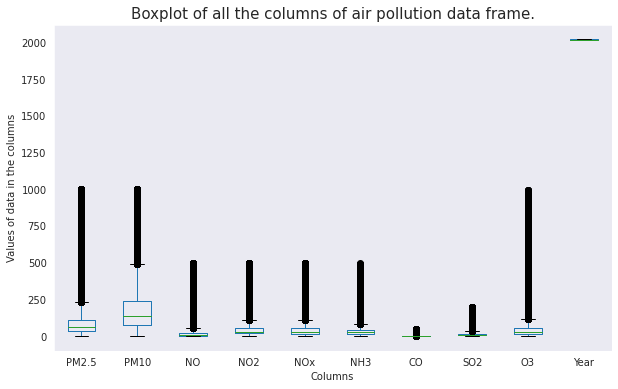

In [ ]:
station_hr_df2.boxplot(grid=False, figsize=(10,6))
plt.title("Boxplot of all the columns of air pollution data frame.", fontsize=15)
plt.xlabel("Columns")
plt.ylabel("Values of data in the columns")

Create a list of all columns in air pollution dataframe which are to be plotted.

In [ ]:
plot_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

See data distibution all each column of air pollution dataframe, alon with with their mean and median.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

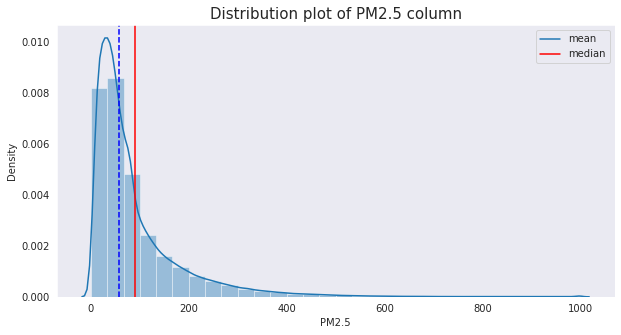

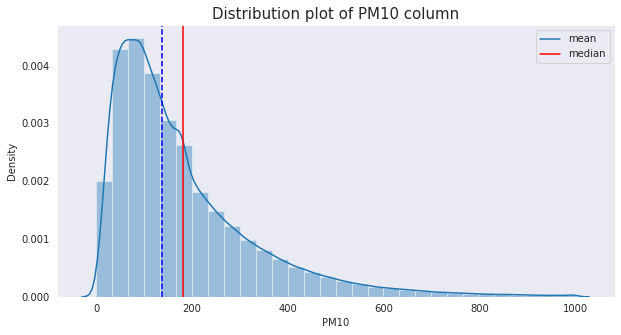

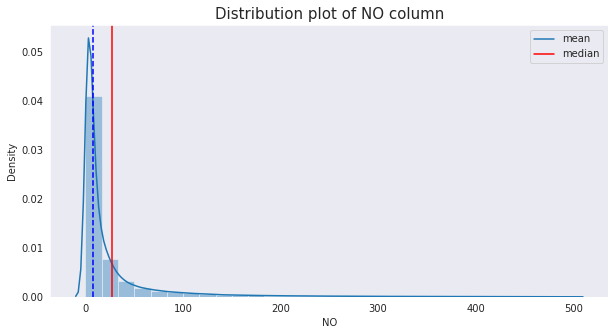

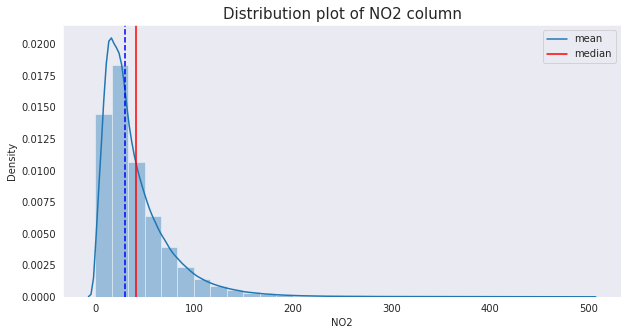

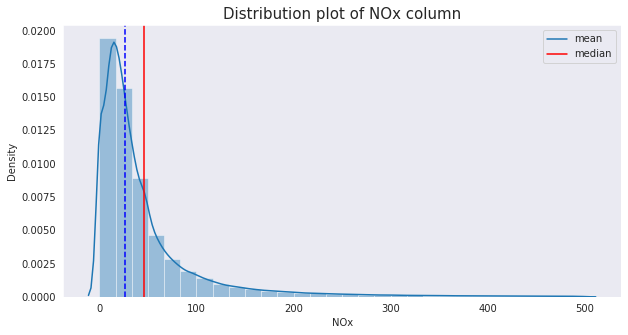

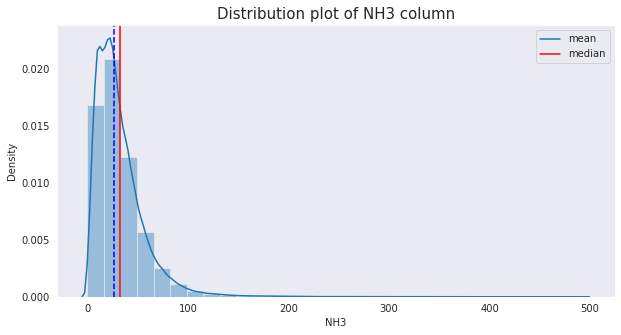

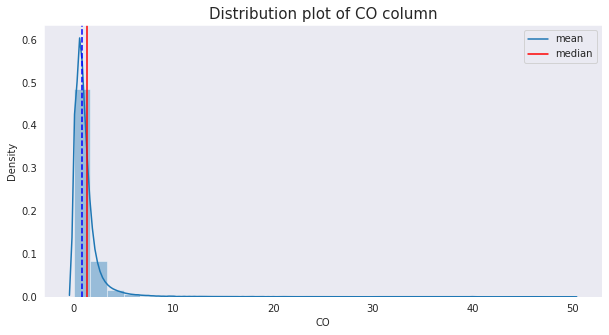

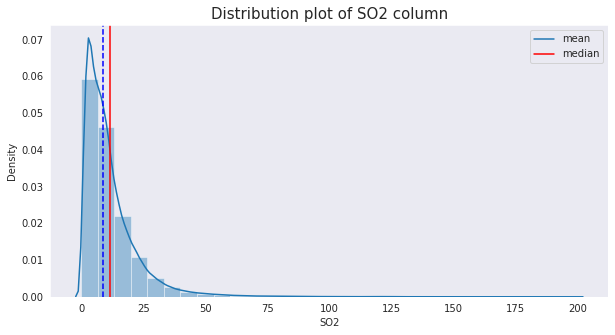

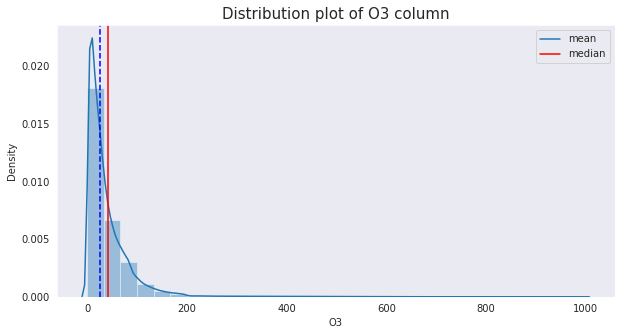

In [ ]:
for i in plot_cols:
  plt.figure(figsize=(10,5))
  sns.distplot(station_hr_df2[i], bins=30)
  plt.axvline(x=station_hr_df2[i].mean(), color='red', label="mean")
  plt.axvline(x=station_hr_df2[i].median(), color='blue', ls='--', lw=1.5, label="median")
  plt.legend(["mean", "median"])
  plt.title("Distribution plot of {} column".format(i), fontsize=15)

Create a true copy of air pollution data frame, on which further pre-processing will be done and the original data frame will be intact.

In [ ]:
station_hr_df2_copy1 = station_hr_df2.copy()

Have a glance of copied data frame.

In [ ]:
station_hr_df2_copy1.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,City,Year
141133,DL001,2018-11-11 15:00:00,130.00,274.00,1.70,54.00,30.10,NaN,0.80,26.40,NaN,Delhi,2018
141134,DL001,2018-11-11 16:00:00,133.25,279.00,1.70,55.07,30.67,25.55,0.83,27.97,NaN,Delhi,2018
141135,DL001,2018-11-11 17:00:00,140.25,284.25,1.58,55.88,30.97,24.30,0.85,24.80,105.23,Delhi,2018
141136,DL001,2018-11-11 18:00:00,153.25,332.00,1.63,64.05,35.40,28.57,1.53,20.25,83.53,Delhi,2018
141137,DL001,2018-11-11 19:00:00,247.00,575.00,1.75,80.07,43.98,37.90,1.68,18.00,53.57,Delhi,2018


Check the index othe data frame.

In [ ]:
station_hr_df2_copy1.set_index('Datetime', inplace=True)

Verify the change of the index

In [ ]:
station_hr_df2_copy1.head()

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,City,Year
Datetime,,,,,,,,,,,,
2018-11-11 15:00:00,DL001,130.00,274.00,1.70,54.00,30.10,NaN,0.80,26.40,NaN,Delhi,2018
2018-11-11 16:00:00,DL001,133.25,279.00,1.70,55.07,30.67,25.55,0.83,27.97,NaN,Delhi,2018
2018-11-11 17:00:00,DL001,140.25,284.25,1.58,55.88,30.97,24.30,0.85,24.80,105.23,Delhi,2018
2018-11-11 18:00:00,DL001,153.25,332.00,1.63,64.05,35.40,28.57,1.53,20.25,83.53,Delhi,2018
2018-11-11 19:00:00,DL001,247.00,575.00,1.75,80.07,43.98,37.90,1.68,18.00,53.57,Delhi,2018


Application of interpolation method of the data frame, to interpolate missing values based on the previous timestamps.

In [ ]:
station_hr_df2_copy1.interpolate(method='time', inplace=True)

Have a glance of the updated data frame.

In [ ]:
station_hr_df2_copy1.head()

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,City,Year
Datetime,,,,,,,,,,,,
2018-11-11 15:00:00,DL001,130.00,274.00,1.70,54.00,30.10,NaN,0.80,26.40,NaN,Delhi,2018
2018-11-11 16:00:00,DL001,133.25,279.00,1.70,55.07,30.67,25.55,0.83,27.97,NaN,Delhi,2018
2018-11-11 17:00:00,DL001,140.25,284.25,1.58,55.88,30.97,24.30,0.85,24.80,105.23,Delhi,2018
2018-11-11 18:00:00,DL001,153.25,332.00,1.63,64.05,35.40,28.57,1.53,20.25,83.53,Delhi,2018
2018-11-11 19:00:00,DL001,247.00,575.00,1.75,80.07,43.98,37.90,1.68,18.00,53.57,Delhi,2018


In [ ]:
station_hr_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502210 entries, 141133 to 2199909
Data columns (total 13 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   StationId  1502210 non-null  object        
 1   Datetime   1502210 non-null  datetime64[ns]
 2   PM2.5      1081607 non-null  float64       
 3   PM10       926814 non-null   float64       
 4   NO         1138343 non-null  float64       
 5   NO2        1155412 non-null  float64       
 6   NOx        1216237 non-null  float64       
 7   NH3        807972 non-null   float64       
 8   CO         1187099 non-null  float64       
 9   SO2        1004384 non-null  float64       
 10  O3         1038922 non-null  float64       
 11  City       1502210 non-null  object        
 12  Year       1502210 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 160.5+ MB


Check the difference in null values in all the columns between original air pollution data frame and its copy data frame.

In [ ]:
station_hr_df2_copy1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1502210 entries, 2018-11-11 15:00:00 to 2019-12-31 23:00:00
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   StationId  1502210 non-null  object 
 1   PM2.5      1502210 non-null  float64
 2   PM10       1502210 non-null  float64
 3   NO         1502210 non-null  float64
 4   NO2        1502210 non-null  float64
 5   NOx        1502210 non-null  float64
 6   NH3        1502209 non-null  float64
 7   CO         1502210 non-null  float64
 8   SO2        1502210 non-null  float64
 9   O3         1502208 non-null  float64
 10  City       1502210 non-null  object 
 11  Year       1502210 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 149.0+ MB


Check the data distribution each column of the air pollution dataframe copy along with mean and median of the columns, after interpolation of missing values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

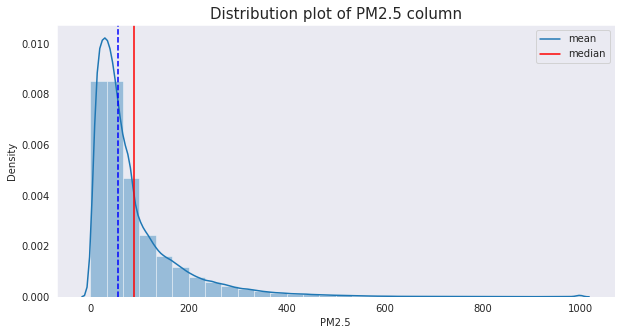

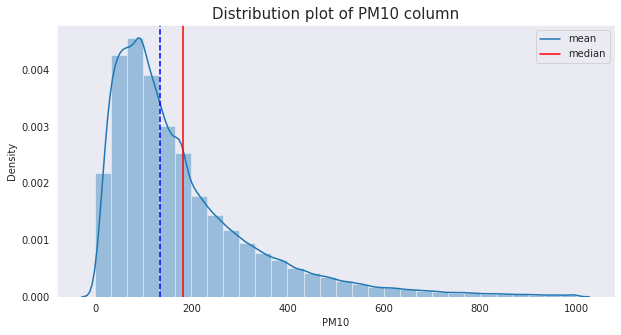

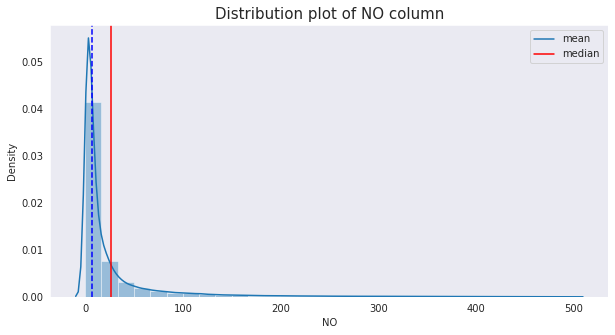

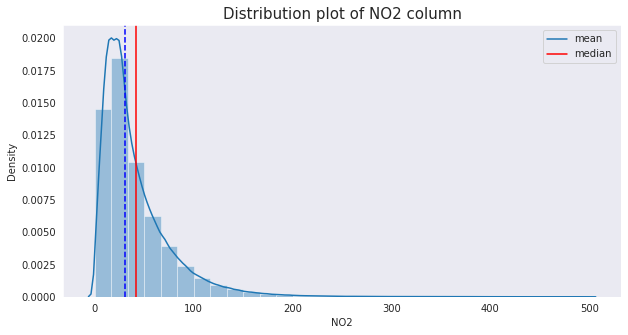

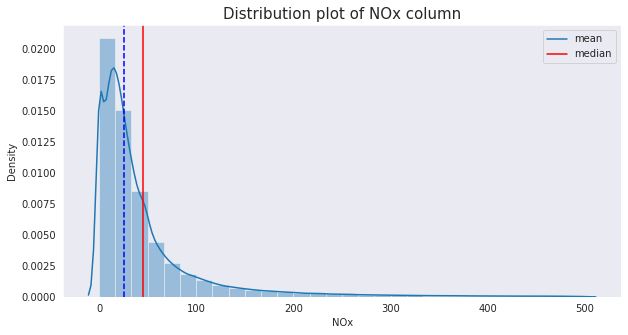

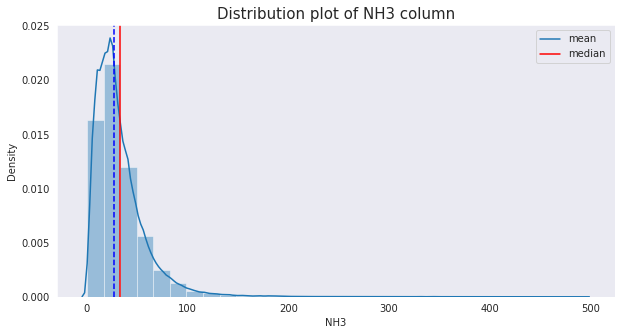

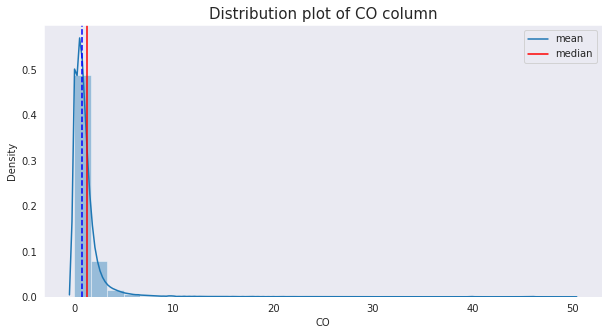

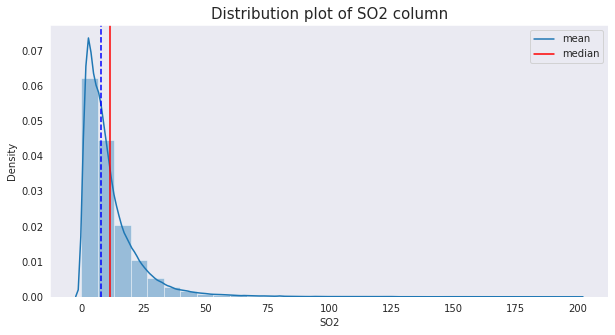

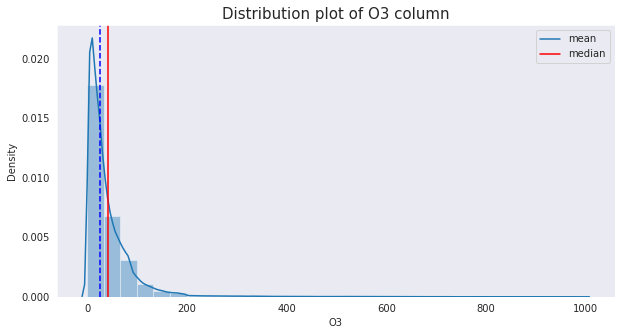

In [ ]:
for i in plot_cols:
  plt.figure(figsize=(10,5))
  sns.distplot(station_hr_df2_copy1[i], bins=30)
  plt.axvline(x=station_hr_df2_copy1[i].mean(), color='red', label="mean")
  plt.axvline(x=station_hr_df2_copy1[i].median(), color='blue', ls='--', lw=1.5, label="median")
  plt.legend(["mean", "median"])
  plt.title("Distribution plot of {} column".format(i), fontsize=15)

Fill the very few missing values that could not be filled through interpolation, with median values.

In [ ]:
station_hr_df2_copy1.fillna(station_hr_df2_copy1.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
station_hr_df2_copy1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1502210 entries, 2018-11-11 15:00:00 to 2019-12-31 23:00:00
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   StationId  1502210 non-null  object 
 1   PM2.5      1502210 non-null  float64
 2   PM10       1502210 non-null  float64
 3   NO         1502210 non-null  float64
 4   NO2        1502210 non-null  float64
 5   NOx        1502210 non-null  float64
 6   NH3        1502210 non-null  float64
 7   CO         1502210 non-null  float64
 8   SO2        1502210 non-null  float64
 9   O3         1502210 non-null  float64
 10  City       1502210 non-null  object 
 11  Year       1502210 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 149.0+ MB


Change the format of display fo values so that values are showed with upto 4 decimal points are shown here after.

In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

*Coding reference for above executions:*

https://stackoverflow.com/questions/55394854/how-to-change-the-format-of-describe-output

Check the descriptive statistics of all the columns of original air pollution data frame.

In [ ]:
station_hr_df2.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Year
count,1081607.0000,926814.0000,1138343.0000,1155412.0000,1216237.0000,807972.0000,1187099.0000,1004384.0000,1038922.0000,1502210.0000
mean,90.1598,182.5127,26.8198,41.0044,46.2679,32.3456,1.2793,11.6751,40.9114,2017.7702
std,98.0311,153.2014,54.5180,37.0428,61.5589,26.6458,2.4388,11.9135,55.4994,1.2649
min,0.0100,0.0100,0.0100,0.0100,0.0000,0.0100,0.0000,0.0100,0.0100,2015.0000
25%,31.0000,75.7500,3.0600,17.1300,12.9300,15.2000,0.4100,4.2800,11.0900,2017.0000
50%,57.9700,137.0000,7.6800,30.2300,26.7800,26.4400,0.8200,8.5700,25.1000,2018.0000
75%,110.7500,241.0000,23.3500,53.3600,52.6100,42.0700,1.4200,15.0000,51.8300,2019.0000
max,1000.0000,1000.0000,500.0000,499.9900,500.0000,494.1100,50.0000,199.9300,997.0000,2019.0000


Check the descriptive statistics of all the columns of copy of air pollution data frame.

In [ ]:
station_hr_df2_copy1.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Year
count,1502210.0000,1502210.0000,1502210.0000,1502210.0000,1502210.0000,1502210.0000,1502210.0000,1502210.0000,1502210.0000,1502210.0000
mean,89.1360,182.5335,26.8825,41.1563,45.5365,32.8581,1.2723,11.6335,42.4052,2017.7702
std,99.7711,157.4969,55.6773,37.4923,62.8085,27.8416,2.6312,12.4476,57.8522,1.2649
min,0.0100,0.0100,0.0100,0.0100,0.0000,0.0100,0.0000,0.0100,0.0100,2015.0000
25%,30.0000,74.6900,3.0000,17.0700,11.5500,15.6000,0.3600,4.0300,11.8500,2017.0000
50%,56.8500,134.2500,7.4500,30.0000,25.6000,26.4400,0.7900,8.1800,25.9300,2018.0000
75%,109.5700,239.5000,22.6000,53.5700,51.6500,42.1000,1.4000,14.8300,53.3500,2019.0000
max,1000.0000,1000.0000,500.0000,499.9900,500.0000,494.1100,50.0000,199.9300,997.0000,2019.0000


Sort the obervartion/ rows in ascending order of values in index column, timestamp in the case here.

In [ ]:
station_hr_df2_copy1.sort_index(inplace=True)

Verify the sorting order of the observations/ rows.

In [ ]:
station_hr_df2_copy1.head()

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,City,Year
Datetime,,,,,,,,,,,,
2015-01-01 01:00:00,KA009,310.6500,935.1800,2.4600,9.9500,6.6900,19.1000,0.0000,5.1500,105.2500,Bengaluru,2015
2015-01-01 01:00:00,KA003,310.6500,935.1800,1.6200,14.8500,8.4600,49.3200,0.1900,2.9500,12.4100,Bengaluru,2015
2015-01-01 01:00:00,MH005,310.6500,935.1800,148.4400,51.5000,24.3800,49.3200,0.0000,2.9500,105.2500,Mumbai,2015
2015-01-01 01:00:00,DL007,598.5100,935.1800,69.0300,35.6900,104.7200,49.3200,0.5800,2.9500,108.0200,Delhi,2015
2015-01-01 01:00:00,DL033,310.6500,935.1800,148.4400,39.0000,219.2500,49.3200,0.0000,0.5000,3.0000,Delhi,2015


Change the index column back to serial numbers.

In [ ]:
station_hr_df2_copy1.reset_index(inplace=True)

Verify the change of index column.

In [ ]:
station_hr_df2_copy1.head()

,Datetime,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,City,Year
0,2015-01-01 01:00:00,KA009,310.6500,935.1800,2.4600,9.9500,6.6900,19.1000,0.0000,5.1500,105.2500,Bengaluru,2015
1,2015-01-01 01:00:00,KA003,310.6500,935.1800,1.6200,14.8500,8.4600,49.3200,0.1900,2.9500,12.4100,Bengaluru,2015
2,2015-01-01 01:00:00,MH005,310.6500,935.1800,148.4400,51.5000,24.3800,49.3200,0.0000,2.9500,105.2500,Mumbai,2015
3,2015-01-01 01:00:00,DL007,598.5100,935.1800,69.0300,35.6900,104.7200,49.3200,0.5800,2.9500,108.0200,Delhi,2015
4,2015-01-01 01:00:00,DL033,310.6500,935.1800,148.4400,39.0000,219.2500,49.3200,0.0000,0.5000,3.0000,Delhi,2015


Check the number of observations and variables for different cities in the copy of air pollution data frame.

In [ ]:
for city in cities_required1:
  print(city, "|",station_hr_df2_copy1[station_hr_df2_copy1.City == city].shape)

Bengaluru | (243874, 13)
Mumbai | (88060, 13)
Delhi | (925734, 13)
Hyderabad | (183617, 13)
Jaipur | (60925, 13)


Create separate air pollution data frames for each city.

In [ ]:
for city in station_hr_df2_copy1.City.unique():
  globals()[f"{city}_hr_df"] = station_hr_df2_copy1[station_hr_df2_copy1.City == city]

Have a glance of air pollution data frame for bengaluru city.

In [ ]:
Bengaluru_hr_df.head()

,Datetime,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,City,Year
0,2015-01-01 01:00:00,KA009,310.6500,935.1800,2.4600,9.9500,6.6900,19.1000,0.0000,5.1500,105.2500,Bengaluru,2015
1,2015-01-01 01:00:00,KA003,310.6500,935.1800,1.6200,14.8500,8.4600,49.3200,0.1900,2.9500,12.4100,Bengaluru,2015
14,2015-01-01 02:00:00,KA003,655.9300,945.6325,1.9500,15.5300,9.0300,17.8100,0.2100,3.4100,12.1300,Bengaluru,2015
15,2015-01-01 02:00:00,KA009,655.9300,945.6325,2.4500,8.6900,6.0600,17.8100,0.2100,5.0600,121.3800,Bengaluru,2015
21,2015-01-01 03:00:00,KA003,657.6800,956.0850,1.1000,13.1800,7.2500,44.1200,0.3000,3.2000,13.1300,Bengaluru,2015


Check the dimensions of air pollution data frame for bengaluru city.

In [ ]:
Bengaluru_hr_df.shape

(243874, 13)

Check the counts of distinct values of 'StationID' column.

In [ ]:
Bengaluru_hr_df.StationId.value_counts()

KA009    43823
KA003    43823
KA010    36367
KA005    36298
KA002    17316
KA008    13319
KA006    13308
KA004    13305
KA011    13205
KA007    13110
Name: StationId, dtype: int64

Check the number of duplicate values in the data frame as a whole.

In [ ]:
Bengaluru_hr_df.duplicated().sum()

0

Check the number of duplicate values in the particular column 'StationID'.

In [ ]:
Bengaluru_hr_df.StationId.duplicated().sum()

243864

Check the number of duplicate values in the particular column 'Datetime'.

In [ ]:
Bengaluru_hr_df.Datetime.duplicated().sum()

200051

Air pollution data set is an hourly time series data for five years. Mathematically, the number of observations expected for each city would be
= 24 (hours per day) x 365 (days per year) x 5 (no. of years) = 43800.

Bengaluru city has a total of 243874 obervation, in which there are 200051 duplicate values in 'Datetime' column, eleminating which the number of observations would be
= 243874 - 200051 = 43823.

Since, one year out of five years would be a leap year, there would be additional 24 hours i.e., 43800 + 24 = 43824, which is the number of observations for meteoroligical data for all the five cities.

In [ ]:
Bengaluru_hr_df.columns

Index(['Datetime', 'StationId', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'City', 'Year'],
      dtype='object')

Apply pivot table method on air pollution data frame of Bengaluru city, so that the values of all the columns are averaged based on timestamps.

In [ ]:
Bengaluru_hr_df = Bengaluru_hr_df.pivot_table(values = ['StationId', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'City', 'Year'], index='Datetime')

In [ ]:
Bengaluru_hr_df.head()

,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2,Year
Datetime,,,,,,,,,,
2015-01-01 01:00:00,0.0950,34.2100,2.0400,12.4000,7.5750,58.8300,935.1800,310.6500,4.0500,2015
2015-01-01 02:00:00,0.2100,17.8100,2.2000,12.1100,7.5450,66.7550,945.6325,655.9300,4.2350,2015
2015-01-01 03:00:00,21.9000,30.7700,1.6650,10.8200,6.5200,13.1300,956.0850,657.6800,4.2750,2015
2015-01-01 04:00:00,21.5650,16.8600,1.9250,10.3250,6.4600,25.0350,966.5375,182.0000,4.1400,2015
2015-01-01 05:00:00,16.8250,17.9250,1.9350,9.8200,6.2250,5.6550,976.9900,206.5000,4.2550,2015


Create a new column called 'City' and assign the city name as value to all the observations of that column.

In [ ]:
Bengaluru_hr_df['City'] = 'Bengaluru'

In [ ]:
Bengaluru_hr_df.head()

,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2,Year,City
Datetime,,,,,,,,,,,
2015-01-01 01:00:00,0.0950,34.2100,2.0400,12.4000,7.5750,58.8300,935.1800,310.6500,4.0500,2015,Bengaluru
2015-01-01 02:00:00,0.2100,17.8100,2.2000,12.1100,7.5450,66.7550,945.6325,655.9300,4.2350,2015,Bengaluru
2015-01-01 03:00:00,21.9000,30.7700,1.6650,10.8200,6.5200,13.1300,956.0850,657.6800,4.2750,2015,Bengaluru
2015-01-01 04:00:00,21.5650,16.8600,1.9250,10.3250,6.4600,25.0350,966.5375,182.0000,4.1400,2015,Bengaluru
2015-01-01 05:00:00,16.8250,17.9250,1.9350,9.8200,6.2250,5.6550,976.9900,206.5000,4.2550,2015,Bengaluru


In [ ]:
Bengaluru_hr_df.shape

(43823, 11)

In [ ]:
Bengaluru_hr_df.City.value_counts()

Bengaluru    43823
Name: City, dtype: int64

Appication of pivot table method and creation of new city column for other cities air pollution data frames.

In [ ]:
Delhi_hr_df = Delhi_hr_df.pivot_table(values = ['StationId', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'City', 'Year'], index='Datetime')

Delhi_hr_df['City'] = 'Delhi'

Hyderabad_hr_df = Hyderabad_hr_df.pivot_table(values = ['StationId', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'City', 'Year'], index='Datetime')

Hyderabad_hr_df['City'] = 'Hyderabad'

Jaipur_hr_df = Jaipur_hr_df.pivot_table(values = ['StationId', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'City', 'Year'], index='Datetime')

Jaipur_hr_df['City'] = 'Jaipur'

Mumbai_hr_df = Mumbai_hr_df.pivot_table(values = ['StationId', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'City', 'Year'], index='Datetime')

Mumbai_hr_df['City'] = 'Mumbai'

In [ ]:
print(Delhi_hr_df.shape, Hyderabad_hr_df.shape, Jaipur_hr_df.shape, Mumbai_hr_df.shape)

(43823, 11) (43738, 11) (22336, 11) (43823, 11)


Merging vertically the air pollution data frames of all the cities just for the purpose of Exploratory data analysis and assing a varible to the merged data frame.

In [ ]:
airpoll_concat_df = pd.concat([Bengaluru_hr_df, Delhi_hr_df, Hyderabad_hr_df, Jaipur_hr_df, Mumbai_hr_df])

In [ ]:
airpoll_concat_df.shape

(197543, 11)

In [ ]:
airpoll_concat_df.head()

,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2,Year,City
Datetime,,,,,,,,,,,
2015-01-01 01:00:00,0.0950,34.2100,2.0400,12.4000,7.5750,58.8300,935.1800,310.6500,4.0500,2015,Bengaluru
2015-01-01 02:00:00,0.2100,17.8100,2.2000,12.1100,7.5450,66.7550,945.6325,655.9300,4.2350,2015,Bengaluru
2015-01-01 03:00:00,21.9000,30.7700,1.6650,10.8200,6.5200,13.1300,956.0850,657.6800,4.2750,2015,Bengaluru
2015-01-01 04:00:00,21.5650,16.8600,1.9250,10.3250,6.4600,25.0350,966.5375,182.0000,4.1400,2015,Bengaluru
2015-01-01 05:00:00,16.8250,17.9250,1.9350,9.8200,6.2250,5.6550,976.9900,206.5000,4.2550,2015,Bengaluru


In [ ]:
airpoll_concat_df.reset_index(inplace=True)

In [ ]:
airpoll_concat_df.head()

,Datetime,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2,Year,City
0,2015-01-01 01:00:00,0.0950,34.2100,2.0400,12.4000,7.5750,58.8300,935.1800,310.6500,4.0500,2015,Bengaluru
1,2015-01-01 02:00:00,0.2100,17.8100,2.2000,12.1100,7.5450,66.7550,945.6325,655.9300,4.2350,2015,Bengaluru
2,2015-01-01 03:00:00,21.9000,30.7700,1.6650,10.8200,6.5200,13.1300,956.0850,657.6800,4.2750,2015,Bengaluru
3,2015-01-01 04:00:00,21.5650,16.8600,1.9250,10.3250,6.4600,25.0350,966.5375,182.0000,4.1400,2015,Bengaluru
4,2015-01-01 05:00:00,16.8250,17.9250,1.9350,9.8200,6.2250,5.6550,976.9900,206.5000,4.2550,2015,Bengaluru


Save the vertically merged data from as a csv file.

**NOTE:** below line is commented to avoid repeated saving of the data frame.

In [ ]:
# airpoll_concat_df.to_csv('Airpol_five_cities.csv')

In [ ]:
Bengaluru_hr_df.head()

,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2,Year,City
Datetime,,,,,,,,,,,
2015-01-01 01:00:00,0.0950,34.2100,2.0400,12.4000,7.5750,58.8300,935.1800,310.6500,4.0500,2015,Bengaluru
2015-01-01 02:00:00,0.2100,17.8100,2.2000,12.1100,7.5450,66.7550,945.6325,655.9300,4.2350,2015,Bengaluru
2015-01-01 03:00:00,21.9000,30.7700,1.6650,10.8200,6.5200,13.1300,956.0850,657.6800,4.2750,2015,Bengaluru
2015-01-01 04:00:00,21.5650,16.8600,1.9250,10.3250,6.4600,25.0350,966.5375,182.0000,4.1400,2015,Bengaluru
2015-01-01 05:00:00,16.8250,17.9250,1.9350,9.8200,6.2250,5.6550,976.9900,206.5000,4.2550,2015,Bengaluru


Delete unncessary columns from the data frame.

In [ ]:
Bengaluru_hr_df.drop(columns=['Year', 'City'], inplace=True)

In [ ]:
Bengaluru_hr_df.head()

,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2
Datetime,,,,,,,,,
2015-01-01 01:00:00,0.0950,34.2100,2.0400,12.4000,7.5750,58.8300,935.1800,310.6500,4.0500
2015-01-01 02:00:00,0.2100,17.8100,2.2000,12.1100,7.5450,66.7550,945.6325,655.9300,4.2350
2015-01-01 03:00:00,21.9000,30.7700,1.6650,10.8200,6.5200,13.1300,956.0850,657.6800,4.2750
2015-01-01 04:00:00,21.5650,16.8600,1.9250,10.3250,6.4600,25.0350,966.5375,182.0000,4.1400
2015-01-01 05:00:00,16.8250,17.9250,1.9350,9.8200,6.2250,5.6550,976.9900,206.5000,4.2550


In [ ]:
Bengaluru_hr_df.shape

(43823, 9)

Create a list of data frames.

In [ ]:
airp_dfs_list = [Mumbai_hr_df, Delhi_hr_df, Hyderabad_hr_df, Jaipur_hr_df]

Delete unnecessary columns from all the listed data frames.

In [ ]:
for df in airp_dfs_list:
  df.drop(columns=['Year', 'City'], inplace=True)

In [ ]:
print(Delhi_hr_df.shape, Hyderabad_hr_df.shape, Jaipur_hr_df.shape, Mumbai_hr_df.shape)

(43823, 9) (43738, 9) (22336, 9) (43823, 9)


In [ ]:
bengaluru_met_df.head()

,date_time,sunHour,uvIndex.1,moon_illumination,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Year
52584,2015-01-01 00:00:00,11.6000,1,72,18,20,20,16,56,88,0.0000,1010,20,10,134,11,2015
52585,2015-01-01 01:00:00,11.6000,1,72,18,20,20,14,65,91,0.0000,1010,19,7,141,9,2015
52586,2015-01-01 02:00:00,11.6000,1,72,18,19,19,12,74,94,0.0000,1010,19,5,149,8,2015
52587,2015-01-01 03:00:00,11.6000,1,72,18,19,19,10,83,97,0.0000,1010,18,2,156,6,2015
52588,2015-01-01 04:00:00,11.6000,1,72,18,19,19,9,75,93,0.0000,1011,19,5,156,7,2015


In [ ]:
bengaluru_met_df.shape

(43824, 17)

Delete unnecessary column from the data frame.

In [ ]:
bengaluru_met_df.drop(columns='Year', inplace=True)

In [ ]:
bengaluru_met_df.shape

(43824, 16)

In [ ]:
bengaluru_met_df.columns

Index(['date_time', 'sunHour', 'uvIndex.1', 'moon_illumination', 'DewPointC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph'],
      dtype='object')

Change the column name from 'date_time' to 'Datetime'.

In [ ]:
bengaluru_met_df.rename(columns={'date_time':'Datetime'}, inplace=True)

In [ ]:
bengaluru_met_df.head()

,Datetime,sunHour,uvIndex.1,moon_illumination,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
52584,2015-01-01 00:00:00,11.6000,1,72,18,20,20,16,56,88,0.0000,1010,20,10,134,11
52585,2015-01-01 01:00:00,11.6000,1,72,18,20,20,14,65,91,0.0000,1010,19,7,141,9
52586,2015-01-01 02:00:00,11.6000,1,72,18,19,19,12,74,94,0.0000,1010,19,5,149,8
52587,2015-01-01 03:00:00,11.6000,1,72,18,19,19,10,83,97,0.0000,1010,18,2,156,6
52588,2015-01-01 04:00:00,11.6000,1,72,18,19,19,9,75,93,0.0000,1011,19,5,156,7


Sort the observations of the data frame based on the ascending order of values of 'Datetime' columnn, timestamps in the case here.

In [ ]:
bengaluru_met_df.sort_values('Datetime', inplace=True)

Implement the last three pre-processing steps done on meteorological data frame of Bengaluru city, on to the data frames of other cities.

In [ ]:
for df in met_dfs_list:
  df.drop(columns='Year', inplace=True)
  df.rename(columns={'date_time':'Datetime'}, inplace=True)
  df.sort_values('Datetime', inplace=True)

In [ ]:
print(bombay_met_df.shape, delhi_met_df.shape, hyderabad_met_df.shape, jaipur_met_df.shape)

(43824, 16) (43824, 16) (43824, 16) (43824, 16)


Merge the meterological data frame and air pollution data frame of Delhi city.

In [ ]:
Delhi_air_met_df = pd.merge(delhi_met_df, Delhi_hr_df, how="inner", on="Datetime")

In [ ]:
Delhi_air_met_df.head()

,Datetime,sunHour,uvIndex.1,moon_illumination,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,...,windspeedKmph,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2
0,2015-01-01 01:00:00,8.7000,1,72,2,12,12,18,15,51,...,9,3.7160,40.6060,94.9060,41.7840,187.6620,65.0040,935.1800,368.2220,3.2260
1,2015-01-01 02:00:00,8.7000,1,72,3,13,12,15,15,51,...,8,5.4360,21.7740,57.1260,43.4560,176.8300,64.7020,945.6325,569.7360,3.6900
2,2015-01-01 03:00:00,8.7000,1,72,3,13,13,11,15,50,...,6,35.2020,38.0460,132.4640,41.1900,141.0220,16.8520,956.0850,558.2440,2.1000
3,2015-01-01 04:00:00,8.7000,1,72,3,13,13,12,13,48,...,7,34.5060,21.8360,84.7820,39.5520,102.8440,27.3500,966.5375,283.6480,3.7160
4,2015-01-01 05:00:00,8.7000,1,72,3,14,14,13,11,46,...,9,29.1160,24.0340,60.2360,37.4140,80.1240,10.0000,976.9900,290.2540,7.1000


In [ ]:
Delhi_air_met_df.shape

(43823, 25)

In [ ]:
Delhi_air_met_df.sort_values('Datetime', inplace=True)

In [ ]:
Delhi_air_met_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43823 entries, 0 to 43822
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Datetime           43823 non-null  datetime64[ns]
 1   sunHour            43823 non-null  float64       
 2   uvIndex.1          43823 non-null  int64         
 3   moon_illumination  43823 non-null  int64         
 4   DewPointC          43823 non-null  int64         
 5   HeatIndexC         43823 non-null  int64         
 6   WindChillC         43823 non-null  int64         
 7   WindGustKmph       43823 non-null  int64         
 8   cloudcover         43823 non-null  int64         
 9   humidity           43823 non-null  int64         
 10  precipMM           43823 non-null  float64       
 11  pressure           43823 non-null  int64         
 12  tempC              43823 non-null  int64         
 13  visibility         43823 non-null  int64         
 14  winddi

Create a correlation matrix that containes computed pairwise pearson correlation of columns of the data frame.

In [ ]:
Delhi_correlation_matrix = Delhi_air_met_df.corr()

Visualise the correlation matrix created above.

Text(0.5, 1.0, 'Correlation matrix for correlations among columns of the data frame air pollution and meteorological data.')

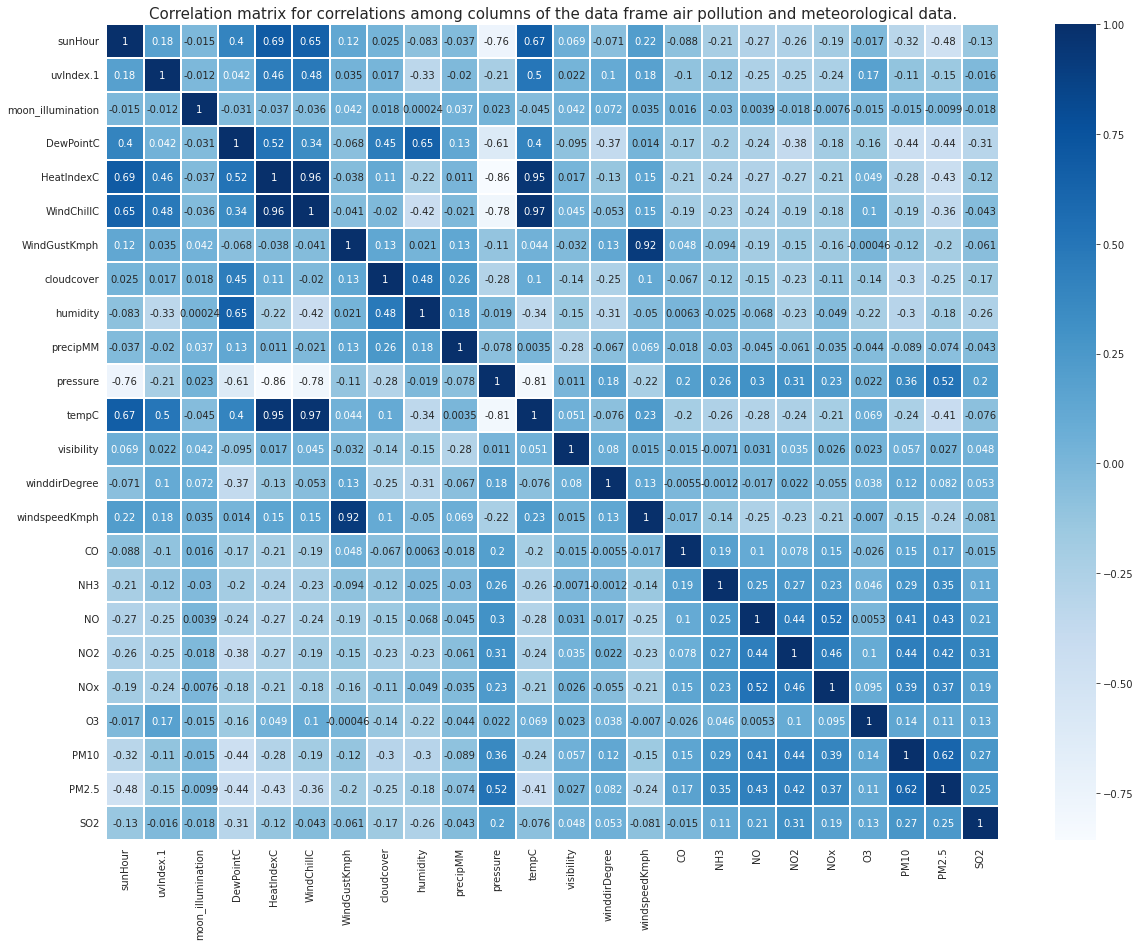

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(Delhi_correlation_matrix, cmap='Blues', annot=True, linewidths=1)
plt.title("Correlation matrix for correlations among columns of the data frame air pollution and meteorological data.", fontsize= 15)

Delete unnecessary columns from the data frame.

In [ ]:
Delhi_air_met_df.drop(columns=['WindChillC', 'WindGustKmph','moon_illumination'], inplace=True)

In [ ]:
Delhi_air_met_df.shape

(43823, 22)

Create updated correlation matrix.

In [ ]:
Delhi_correlation_matrix = Delhi_air_met_df.corr()

Text(0.5, 1.0, 'Correlation matrix for correlations among columns of the data frame air pollution and meteorological data.')

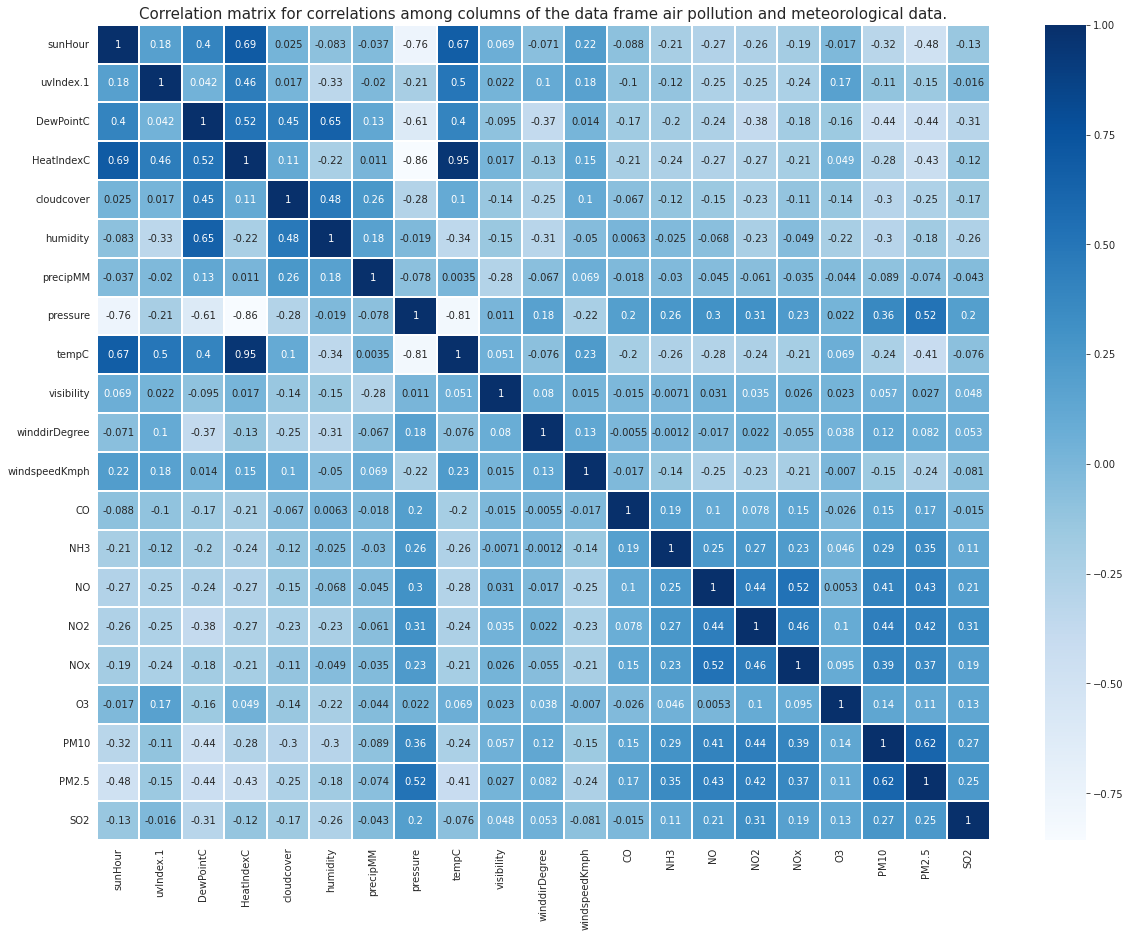

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(Delhi_correlation_matrix, cmap='Blues', annot=True, linewidths=1)
plt.title("Correlation matrix for correlations among columns of the data frame air pollution and meteorological data.", fontsize= 15)

In [ ]:
Delhi_air_met_df.columns

Index(['Datetime', 'sunHour', 'uvIndex.1', 'DewPointC', 'HeatIndexC',
       'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'CO', 'NH3', 'NO', 'NO2', 'NOx', 'O3',
       'PM10', 'PM2.5', 'SO2'],
      dtype='object')

Rearrange the order of the columns of the data frame.

In [ ]:
Delhi_air_met_df = Delhi_air_met_df[['Datetime','sunHour', 'uvIndex.1', 'DewPointC', 'HeatIndexC', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'CO', 'NH3', 'NO', 'NO2', 'NOx', 'O3',
       'PM10', 'SO2', 'PM2.5']]

In [ ]:
Delhi_air_met_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43823 entries, 0 to 43822
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       43823 non-null  datetime64[ns]
 1   sunHour        43823 non-null  float64       
 2   uvIndex.1      43823 non-null  int64         
 3   DewPointC      43823 non-null  int64         
 4   HeatIndexC     43823 non-null  int64         
 5   cloudcover     43823 non-null  int64         
 6   humidity       43823 non-null  int64         
 7   precipMM       43823 non-null  float64       
 8   pressure       43823 non-null  int64         
 9   tempC          43823 non-null  int64         
 10  visibility     43823 non-null  int64         
 11  winddirDegree  43823 non-null  int64         
 12  windspeedKmph  43823 non-null  int64         
 13  CO             43823 non-null  float64       
 14  NH3            43823 non-null  float64       
 15  NO             4382

In [ ]:
Delhi_air_met_df.shape

(43823, 22)

Check the descriptive statistics of the data frame, in vertical format.

In [ ]:
Delhi_air_met_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sunHour,43823.0000,11.1353,2.1770,3.8000,8.7000,11.6000,13.2000,14.0000
uvIndex.1,43823.0000,4.4669,3.4159,1.0000,1.0000,5.0000,8.0000,11.0000
DewPointC,43823.0000,11.5491,8.1563,-22.0000,5.0000,11.0000,19.0000,29.0000
HeatIndexC,43823.0000,31.3487,9.1474,8.0000,24.0000,32.0000,39.0000,61.0000
cloudcover,43823.0000,15.6901,21.6470,0.0000,0.0000,5.0000,24.0000,100.0000
humidity,43823.0000,37.0776,18.4175,2.0000,23.0000,35.0000,50.0000,99.0000
precipMM,43823.0000,0.0367,0.3239,0.0000,0.0000,0.0000,0.0000,17.6000
pressure,43823.0000,1007.2134,7.7523,987.0000,1000.0000,1007.0000,1014.0000,1025.0000
tempC,43823.0000,27.8762,8.4472,0.0000,21.0000,29.0000,34.0000,51.0000
visibility,43823.0000,10.0149,1.0432,0.0000,10.0000,10.0000,10.0000,20.0000


Check meadian value, 99 percentile value and value of three times standard deviation for each column of the data frame.

In [ ]:
for col in Delhi_air_met_df.columns:
  print(col, "-", "Median :", Delhi_air_met_df[col].median(), "|", "99 percentile :", Delhi_air_met_df[col].quantile(0.99),
        "|", "3 Standard deviations :", 3*Delhi_air_met_df[col].std())

Datetime - Median : 2017-07-02 00:00:00 | 99 percentile : 2019-12-13 16:46:48 | 3 Standard deviations : 1581 days 08:15:51.408997704
sunHour - Median : 11.6 | 99 percentile : 14.0 | 3 Standard deviations : 6.53085617152527
uvIndex.1 - Median : 5.0 | 99 percentile : 10.0 | 3 Standard deviations : 10.247622242983894
DewPointC - Median : 11.0 | 99 percentile : 25.0 | 3 Standard deviations : 24.46899782306915
HeatIndexC - Median : 32.0 | 99 percentile : 50.0 | 3 Standard deviations : 27.442304411332472
cloudcover - Median : 5.0 | 99 percentile : 88.0 | 3 Standard deviations : 64.940978017172
humidity - Median : 35.0 | 99 percentile : 84.0 | 3 Standard deviations : 55.25248346487034
precipMM - Median : 0.0 | 99 percentile : 0.9 | 3 Standard deviations : 0.9717033447534514
pressure - Median : 1007.0 | 99 percentile : 1021.0 | 3 Standard deviations : 23.257040139204484
tempC - Median : 29.0 | 99 percentile : 44.0 | 3 Standard deviations : 25.34156406319147
visibility - Median : 10.0 | 99 perc

Merge meteorological data frame and air pollution data frame of rest of the cities.

In [ ]:
Bengaluru_air_met_df = pd.merge(bengaluru_met_df, Bengaluru_hr_df, how="inner", on="Datetime")
Hyderabad_air_met_df = pd.merge(hyderabad_met_df, Hyderabad_hr_df, how="inner", on="Datetime")
Jaipur_air_met_df = pd.merge(jaipur_met_df, Jaipur_hr_df, how="inner", on="Datetime")
Mumbai_air_met_df = pd.merge(bombay_met_df, Mumbai_hr_df, how="inner", on="Datetime")

In [ ]:
print(Bengaluru_air_met_df.shape, Hyderabad_air_met_df.shape, Jaipur_air_met_df.shape, Mumbai_air_met_df.shape)

(43823, 25) (43738, 25) (22336, 25) (43823, 25)


Define a function to perform last three data pre-processing steps perfromed on merged data frame of Delhi city.

In [ ]:
def air_met_df_prepare(df):
  df.sort_values('Datetime', inplace=True)
  df.drop(columns=['WindChillC', 'WindGustKmph','moon_illumination'], inplace=True)
  df = df[['Datetime','sunHour', 'uvIndex.1', 'DewPointC', 'HeatIndexC', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'CO', 'NH3', 'NO', 'NO2', 'NOx', 'O3',
       'PM10', 'SO2', 'PM2.5']]

Create a list of data frames for remaining cities.

In [ ]:
air_met_dfs_list = [Bengaluru_air_met_df, Hyderabad_air_met_df, Jaipur_air_met_df, Mumbai_air_met_df]

Apply define pre-processing function on the listed data frames.

In [ ]:
for df in air_met_dfs_list:
  air_met_df_prepare(df)

In [ ]:
print(Bengaluru_air_met_df.shape, Hyderabad_air_met_df.shape, Jaipur_air_met_df.shape, Mumbai_air_met_df.shape)

(43823, 22) (43738, 22) (22336, 22) (43823, 22)


Save merged data frames of all the cites in to csv files.

**NOTE:** the below lines are commented out to avoid repeated saving of data frames.

In [ ]:
# Delhi_air_met_df.to_csv('Delhi_air_met_df.csv')
# Bengaluru_air_met_df.to_csv('Bengaluru_air_met_df.csv')
# Hyderabad_air_met_df.to_csv('Hyderabad_air_met_df.csv')
# Jaipur_air_met_df.to_csv('Jaipur_air_met_df.csv')
# Mumbai_air_met_df.to_csv('Mumbai_air_met_df.csv')

Remove the saved csv files of merged data frames for all the cities.

**NOTE:** if the pervious command line is uncommented and run, then the below line needs to be uncomment and executed, after downloading the csv files.

In [ ]:
# ! rm Delhi_air_met_df.csv
# ! rm Bengaluru_air_met_df.csv
# ! rm Hyderabad_air_met_df.csv
# ! rm Jaipur_air_met_df.csv
# ! rm Mumbai_air_met_df.csv

*Coding reference for all executions on pandas data frames:*

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html